<a href="https://colab.research.google.com/github/Aligreu/spotify-project/blob/main/Analyze_Spotify_Top_100_Songs_2010_2019.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
"""Description for each column as per metadata of the dataset are as follows:

First column is ID
bpm = Beats.Per.Minute - The tempo of the song
nrgy = The energy of a song - the higher the value, the more energetic the song
dnce = Danceability - The higher the value, the easier it is to dance to this song
dB = Loudness - The higher the value, the louder the song
live = Liveness - The higher the value, the more likely the song is a live recording
val = Valence - The higher the value, the more positive mood for the song
dur = Length - The duration of the song in seconds
acous = Acousticness - The higher the value the more acoustic the song is
spch = Speechiness - The higher the value the more spoken word the song contains
pop = Popularity- The higher the value the more popular the song is"""

'Description for each column as per metadata of the dataset are as follows:\n\nFirst column is ID\nbpm = Beats.Per.Minute - The tempo of the song\nnrgy = The energy of a song - the higher the value, the more energetic the song\ndnce = Danceability - The higher the value, the easier it is to dance to this song\ndB = Loudness - The higher the value, the louder the song\nlive = Liveness - The higher the value, the more likely the song is a live recording\nval = Valence - The higher the value, the more positive mood for the song\ndur = Length - The duration of the song in seconds\nacous = Acousticness - The higher the value the more acoustic the song is\nspch = Speechiness - The higher the value the more spoken word the song contains\npop = Popularity- The higher the value the more popular the song is'

In [50]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")

In [11]:
pd.option_context('display.max_columns', 50)

In [12]:
data = pd.read_excel('/content/drive/MyDrive/Spotify 2010 - 2019 Top 100 Songs.xlsx').copy()
data.iloc[:5, :]

,title,artist,top genre,year released,added,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,top year,artist type
0,STARSTRUKK (feat. Katy Perry),3OH!3,dance pop,2009,2022‑02‑17,140,81,61,-6,23,23,203,0,6,70,2010,Duo
1,My First Kiss (feat. Ke$ha),3OH!3,dance pop,2010,2022‑02‑17,138,89,68,-4,36,83,192,1,8,68,2010,Duo
2,I Need A Dollar,Aloe Blacc,pop soul,2010,2022‑02‑17,95,48,84,-7,9,96,243,20,3,72,2010,Solo
3,Airplanes (feat. Hayley Williams of Paramore),B.o.B,atl hip hop,2010,2022‑02‑17,93,87,66,-4,4,38,180,11,12,80,2010,Solo
4,Nothin' on You (feat. Bruno Mars),B.o.B,atl hip hop,2010,2022‑02‑17,104,85,69,-6,9,74,268,39,5,79,2010,Solo


In [13]:
data.shape

(1000, 17)

In [14]:
data.dtypes

title            object
artist           object
top genre        object
year released     int64
added            object
bpm               int64
nrgy              int64
dnce              int64
dB                int64
live              int64
val               int64
dur               int64
acous             int64
spch              int64
pop               int64
top year          int64
artist type      object
dtype: object

# Explore Data

remove spaces between columns names

In [29]:
data.columns = data.columns.str.replace(' ', '_')

data.head()

,title,artist,top_genre,year_released,added,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,top_year,artist_type
1,My First Kiss (feat. Ke$ha),3OH!3,dance pop,2010,2022‑02‑17,138,89,68,-4,36,83,192,1,8,68,2010,Duo
2,I Need A Dollar,Aloe Blacc,pop soul,2010,2022‑02‑17,95,48,84,-7,9,96,243,20,3,72,2010,Solo
3,Airplanes (feat. Hayley Williams of Paramore),B.o.B,atl hip hop,2010,2022‑02‑17,93,87,66,-4,4,38,180,11,12,80,2010,Solo
4,Nothin' on You (feat. Bruno Mars),B.o.B,atl hip hop,2010,2022‑02‑17,104,85,69,-6,9,74,268,39,5,79,2010,Solo
5,Magic (feat. Rivers Cuomo),B.o.B,atl hip hop,2010,2022‑02‑17,82,93,55,-4,35,79,196,1,34,71,2010,Solo


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 966 entries, 1 to 999
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   title          966 non-null    object
 1   artist         966 non-null    object
 2   top_genre      966 non-null    object
 3   year_released  966 non-null    int64 
 4   added          966 non-null    object
 5   bpm            966 non-null    int64 
 6   nrgy           966 non-null    int64 
 7   dnce           966 non-null    int64 
 8   dB             966 non-null    int64 
 9   live           966 non-null    int64 
 10  val            966 non-null    int64 
 11  dur            966 non-null    int64 
 12  acous          966 non-null    int64 
 13  spch           966 non-null    int64 
 14  pop            966 non-null    int64 
 15  top_year       966 non-null    int64 
 16  artist_type    966 non-null    object
dtypes: int64(12), object(5)
memory usage: 135.8+ KB


checking for duplicates and missing values

In [17]:
data.isnull().sum()

title            0
artist           0
top_genre        0
year_released    0
added            0
bpm              0
nrgy             0
dnce             0
dB               0
live             0
val              0
dur              0
acous            0
spch             0
pop              0
top_year         0
artist_type      0
dtype: int64

In [18]:
data.duplicated().sum()

0

In [19]:
data.describe()

,year_released,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,top_year
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,2014.390000,121.262000,69.502000,66.876000,-5.663000,17.911000,50.901000,220.406000,14.36900,10.064000,74.840000,2014.500000
std,3.241359,26.238022,15.961415,13.121921,2.025224,13.431511,21.563399,39.927677,19.45403,9.276743,8.807836,2.873719
min,1975.000000,65.000000,6.000000,19.000000,-18.000000,2.000000,4.000000,113.000000,0.00000,2.000000,35.000000,2010.000000
25%,2012.000000,100.000000,59.000000,59.000000,-7.000000,9.000000,35.000000,197.000000,2.00000,4.000000,70.000000,2012.000000
50%,2014.000000,122.000000,71.000000,68.000000,-5.000000,12.000000,50.500000,216.000000,6.00000,6.000000,76.000000,2014.500000
75%,2017.000000,134.000000,81.250000,75.000000,-4.000000,23.000000,68.000000,237.000000,19.00000,12.000000,81.000000,2017.000000
max,2021.000000,206.000000,98.000000,96.000000,-1.000000,83.000000,97.000000,688.000000,98.00000,53.000000,95.000000,2019.000000


In [20]:
data.describe(include="O")

,title,artist,top_genre,added,artist_type
count,1000,1000,1000,1000,1000
unique,945,444,132,26,4
top,Paradise,Taylor Swift,dance pop,2020‑06‑22,Solo
freq,3,21,361,276,748


In [21]:
data = data[(data['year_released'] >= 2010) & (data['year_released'] <= 2019)]

In [67]:
data.head(2)

,title,artist,top_genre,year_released,added,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,top_year,artist_type
1,My First Kiss (feat. Ke$ha),3OH!3,dance pop,2010,2022‑02‑17,138,89,68,-4,36,83,192,1,8,68,2010,Duo
2,I Need A Dollar,Aloe Blacc,pop soul,2010,2022‑02‑17,95,48,84,-7,9,96,243,20,3,72,2010,Solo


In [23]:
data.shape

(966, 17)

In [24]:
print(data['year_released'].min())
print(data['year_released'].max())

2010
2019


Quation 1

 what is the most frequent Artist type ?

Text(0.5, 1.0, 'the most frequent artist type')

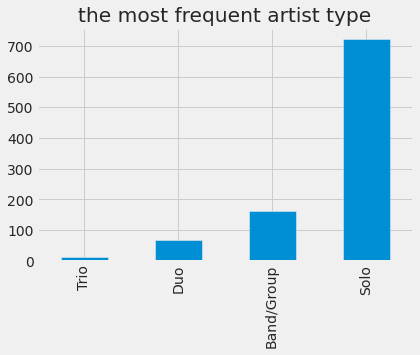

In [51]:
data['artist_type'].value_counts().sort_values(ascending=True).plot(kind='bar')
plt.title('the most frequent artist type')

what year prouduced the most popular songs ?


Text(0.5, 1.0, 'distribution of popularity')

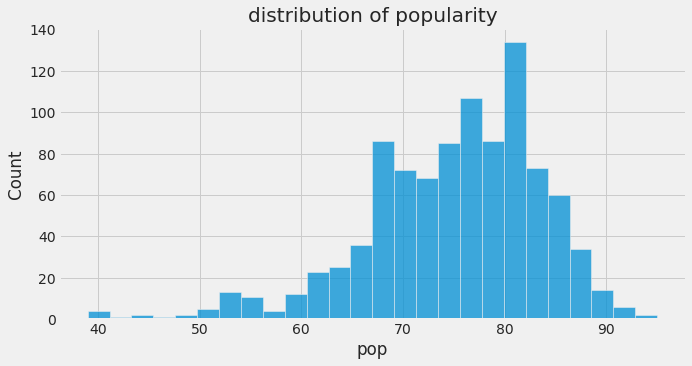

In [66]:
plt.figure(figsize=(10,5))

sns.histplot(data['pop'])
plt.title('distribution of popularity')

year_released
2010    71.957447
2011    72.967742
2012    73.834862
2013    72.941860
2014    74.841584
2015    75.171717
2016    75.069767
2017    77.565657
2018    78.035714
2019    77.206897
Name: pop, dtype: float64


Text(0.5, 1.0, 'The mean popularity of each year')

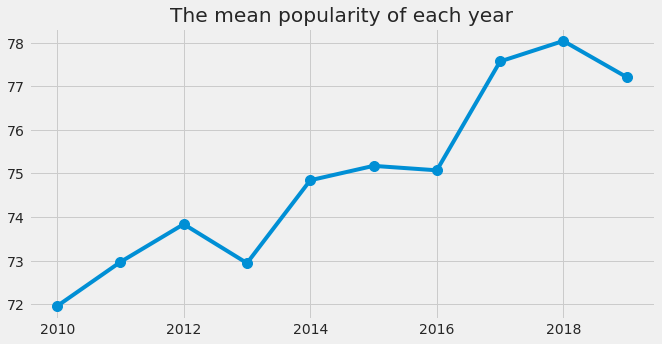

In [57]:
plt.figure(figsize=(10,5))


pop_grouped = data.groupby('year_released')['pop'].mean()
print(pop_grouped)

plt.plot(pop_grouped,  marker='o', markersize=10, )
plt.title("The mean popularity of each year")

is the energy of the song affect the song popularity ?

In [85]:
energy_pop_data = data.loc[:, ['nrgy','pop']]
energy_pop_data.head()

Text(0.5, 1.0, 'the energy column distribution')

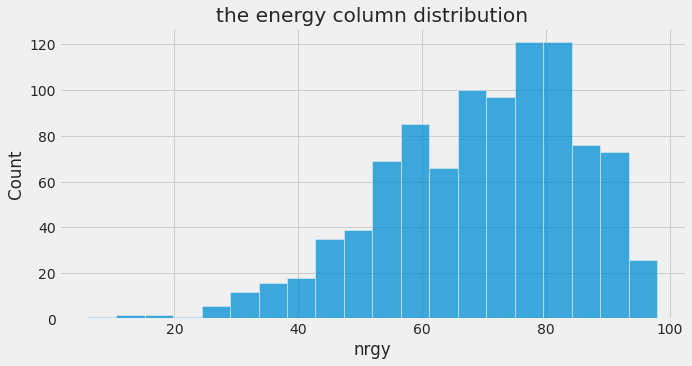

In [99]:
plt.figure(figsize=(10,5))

sns.histplot(energy_pop_data['nrgy'], bins=20)
plt.title("the energy column distribution")

In [91]:
# correlation between the two variables

corr = energy_pop_data.corr()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'energy vs. popluarity')

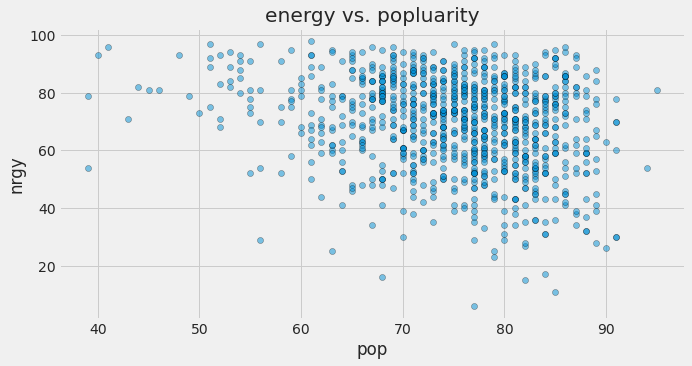

In [90]:
plt.figure(figsize=(10,5))

sns.scatterplot(energy_pop_data['pop'], energy_pop_data['nrgy'], edgecolor='k', alpha=0.5)
plt.title("energy vs. popluarity")